# 1 Intro: Basic Curve Fitting with Gradient Descent

## Setting
### Inputs

In [1]:
import random
import math

n = 20
alpha = 0.01
epsilon = 0.1 ** 5

### Make initial dataset

In [2]:
random.seed(42)
x = []
y = []
for i in range(n):
    x.append(random.random())
    y.append(random.random())
print("x: ", x)
print("y: ", y)

x:  [0.6394267984578837, 0.27502931836911926, 0.7364712141640124, 0.8921795677048454, 0.4219218196852704, 0.21863797480360336, 0.026535969683863625, 0.6498844377795232, 0.2204406220406967, 0.8094304566778266, 0.8058192518328079, 0.3402505165179919, 0.9572130722067812, 0.09274584338014791, 0.8474943663474598, 0.8071282732743802, 0.5362280914547007, 0.3785343772083535, 0.8294046642529949, 0.8617069003107772]
y:  [0.025010755222666936, 0.22321073814882275, 0.6766994874229113, 0.08693883262941615, 0.029797219438070344, 0.5053552881033624, 0.1988376506866485, 0.5449414806032167, 0.5892656838759087, 0.006498759678061017, 0.6981393949882269, 0.15547949981178155, 0.33659454511262676, 0.09671637683346401, 0.6037260313668911, 0.7297317866938179, 0.9731157639793706, 0.552040631273227, 0.6185197523642461, 0.577352145256762]


### Guess m and b

In [3]:
m = 0.5
b = 0
print("m: ", m, "  b: ", b)

m:  0.5   b:  0


## Gradient Descent Process

In [4]:
detected = False
while not detected:
    delta_m = 0
    delta_b = 0
    for i in range(n):
        delta_m += (2*b*x[i] + 2*m*(x[i] ** 2) - 2*x[i]*y[i])
        delta_b += (2*b + 2*m*x[i] - 2*y[i])
    delta_m = delta_m / n
    delta_b = delta_b / n
    m -= alpha * delta_m
    b -= alpha * delta_b
    if math.sqrt(delta_m**2 + delta_b**2) < epsilon:
        detected = True

print("m: ", m, "  b: ", b)

m:  0.23606845773749743   b:  0.27746866427140193


## Scikit-learn Linear Regression

In [5]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import matplotlib.pyplot as plt

mod = LinearRegression()
df_x = pd.DataFrame(x)
df_y = pd.DataFrame(y)
mod_lin = mod.fit(df_x, df_y)
print('m:', mod.coef_[0]) 
print('b:', mod.intercept_)

m: [0.2359993]
b: [0.27751048]


We can confirm that the answers are almost the same in both processes.

# 2 Building and Training a Neural Network for Rasterized Digit Classification

## Setup

### Load Data

In [6]:
# Reference: https://github.com/sorki/python-mnist/blob/master/mnist/loader.py
import struct
import numpy as np

train_image_path = './data/train-images-idx3-ubyte'
train_label_path = './data/train-labels-idx1-ubyte'
test_image_path = './data/t10k-images-idx3-ubyte'
test_label_path = './data/t10k-labels-idx1-ubyte'
with open(train_label_path, 'rb') as file:
    magic, size = struct.unpack(">II", file.read(8)) # 使わないけど読み込んどかないとlabalsに余計なものが読み込まれちゃう。
    labels = file.read()
with open(train_image_path, 'rb') as file:
    magic, size, rows, cols = struct.unpack(">IIII", file.read(16))
    image_data = file.read()
print("size:", size, '  rows:', rows, '  cols:', cols)
images = []
for i in range(size):
    images.append([0] * rows * cols)
    images[i][:] = image_data[i * rows * cols:(i + 1) * rows * cols]

size: 60000   rows: 28   cols: 28


In [7]:
with open(test_label_path, 'rb') as file:
    magic, size_test = struct.unpack(">II", file.read(8))
    labels_test = file.read()
with open(test_image_path, 'rb') as file:
    magic, size_test, rows, cols = struct.unpack(">IIII", file.read(16))
    image_data_test = file.read()
print("size:", size_test, '  rows:', rows, '  cols:', cols)
images_test = []
for i in range(size_test):
    images_test.append([0] * rows * cols)
    images_test[i][:] = image_data_test[i * rows * cols:(i + 1) * rows * cols]

size: 10000   rows: 28   cols: 28


In [8]:
train = []
for i in range(size):
    label_onehot = [0] * 10
    label_onehot[labels[i]] = 1
    train.append([np.reshape(images[i], (-1,1)), np.reshape(label_onehot, (-1,1))])
test = []
for i in range(size_test):
    label_onehot = [0] * 10
    label_onehot[labels_test[i]] = 1
    test.append([np.reshape(images_test[i], (-1,1)), np.reshape(label_onehot, (-1,1))])


#### Show Image

In [9]:
# As numbers
img_num = 1
for idx, val in enumerate(images[img_num]):
    if idx%28==0:
        print('\n')
    print(str(val).center(3), end=' ')
print('\n\nLabel: ', labels[img_num])



 0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  

 0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  

 0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  

 0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  

 0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   51 159 253 159  50  0   0   0   0   0   0   0   0  

 0   0   0   0   0   0   0   0   0   0   0   0   0   0   48 238 252 252 252 237  0   0   0   0   0   0   0   0  

 0   0   0   0   0   0   0   0   0   0   0   0   0   54 227 253 252 239 233 252  57  6   0   0   0   0   0   0  

 0   0   0   0   0   0   0   0   0   0   0   10  60 224 252 253 252 202  84 252 253 122  0   0   0   0   0   0  

 0   0   0   0   0   0   0   0   0   0   0  163 252 252 252 253 252 252  96 189 253 16

In [10]:
import matplotlib.pyplot as plt
import numpy as np

def mnist_digit_show(flatimage, outname=None):
    image = np.reshape(flatimage, (28, 28))
    plt.matshow(image, cmap=plt.cm.binary)
    plt.xticks([])
    plt.yticks([])
    if outname:
        plt.savefig(outname)
    else:
        plt.show()

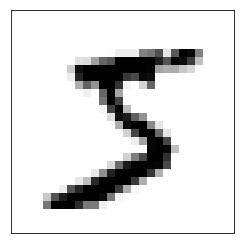

In [11]:
mnist_digit_show(images[0])

### Data for debugging

In [12]:
import pickle
import gzip

location = './debugdata/tinyMNIST.pkl.gz'
f = gzip.open(location, 'rb')
u = pickle._Unpickler(f)
u.encoding = 'latin1'
train, test = u.load()

## Neural Network

### Inputs

- nl: number of dense (fully connected) linear layers in your NN (excluding the first and last layers)
- nh: numnber of units in each of the hidden layers
- ne: number of training epochs
- nb: number of training samples per batch
- alpha: learning rate
- lam: Regularization parameter.


In [13]:
# nl = 2
# nh = 30
# ne = 10000
# nb = 6000
# alpha = 0.1
# lam = 0.0001
# output_type = 0

nl = 2
nh = 30
ne = 20000
nb = 10
alpha = 0.1
lam = 0.0001
output_type = 0

### Functions

In [14]:
import random
np.random.seed(42)
random.seed(42)

layers = [train[0][0].shape[0]] + [nh]*nl + [train[0][1].shape[0]]
L = len(layers)
# biases = [np.random.randn(n, 1) for n in layers[1:]] # input layer以外で必要. sizeが((30,1),(30,1),(10,1))のlist of lists.
biases = [np.zeros((n, 1)) for n in layers[1:]] # input layer以外で必要. sizeが((30,1),(30,1),(10,1))のlist of lists.
weights = [np.random.randn(n, m) for (m, n) in zip(layers[:-1], layers[1:])] # ((784,30),(30,30),(30,10)). 長さmの縦長行列を長さnに変換する。
deltas = [[np.zeros((n, 1)) for n in layers]] * nb # ((784,1),(30,1),(30,1),(10,1)) x 300
z_list = [[np.zeros((n, 1)) for n in layers]] * nb # ((784,1),(30,1),(30,1),(10,1)) x 300. input layerは不要だけど簡単化のためつけている。
a_list = [[np.zeros((n, 1)) for n in layers]] * nb # ((784,1),(30,1),(30,1),(10,1)) x 300

def SGD_train(train, ne, nb, alpha, lam = 0.0, log_interval=10, test=None):
    """SGD for training parameters
    If verbose is set, print progressive accuracy updates.
    If test set is provided, routine will print accuracy on test set as learning evolves
    """
    for epoch in range(ne):
        if epoch % log_interval == 0:
            log_train_progress(train, test, epoch)
        batch = random.sample(range(0, len(train)), nb)
        for s, sample in enumerate(batch):
            forward_back_prop(train[sample][0], train[sample][1], s)
        for l in range(L-1):
            for s in range(nb):
                biases[l] -= (alpha/nb) * deltas[s][l+1]
                weights[l] -= (alpha/nb) * np.dot(deltas[s][l+1], a_list[s][l].T)
    log_train_progress(train, test, ne)

def forward_back_prop(x, y, s):
    """Forward & back propagation for derivatives of C wrt parameters"""
    a_list[s][0] = x

    # Feedforward
    for l in range(1, L):
        z_list[s][l] = np.dot(weights[l-1], a_list[s][l-1]) + biases[l-1]
        if l == L-1 and output_type == 0:
            a_list[s][l] = softmax(z_list[s][l])
        else:
            a_list[s][l] = sigmoid(z_list[s][l])

    # Output Error
    if output_type == 1:
        deltas[s][L-1] = grad_cost(a_list[s][L-1], y) * sigmoid_prime(z_list[s][L-1])
    else:
        deltas[s][L-1] = delta_cross_entropy(a_list[s][L-1], y)

    # Back propagate
    for l in range(L-2, -1, -1): # layerはoutputの後から遡っていく。L=4ならlayer=2,1,0
        deltas[s][l] = np.dot(weights[l].T, deltas[s][l+1]) * sigmoid_prime(z_list[s][l])
        # l=2の時、deltas[s][l]は(30, 1), weights[l].Tは(30, 10), deltas[s][l+1]は(10, 1), z_list[s][l]は(30, 1)

def grad_cost(a, y):
    """gradient of cost function. Assumes C(a,y) = (a-y)^2/2"""
    return (a - y)

def sigmoid(z, threshold=20):
    z = np.clip(z, -threshold, threshold)
    return 1.0 / (1.0 + np.exp(-z))

def sigmoid_prime(z):
    return sigmoid(z) * (1.0 - sigmoid(z))

def softmax(z, overflow=False):
    exp_z = np.exp(z)
    if overflow:
        exp_z = np.exp(z - np.max(z))
    return exp_z / np.sum(exp_z)

def delta_cross_entropy(p, y):
    return (p - y)

def forward_prop(a):
    """forward propagation for evaluate function only"""
    for w, b in zip(weights, biases):
        z = np.dot(w, a) + b
        a = sigmoid(z)
    return a

def evaluate(data):
    """Evaluate current model on labeled train/test data"""
    ctr = 0
    for x, y in data:
        yhat = forward_prop(x)
        ctr += yhat.argmax() == y.argmax()
    return float(ctr) / float(len(data))

def log_train_progress(train, test, epoch):
    """Logs training progress"""
    acc_train = evaluate(train)
    if test is not None:
        acc_test = evaluate(test)
        print("Epoch {:4d}: Train {:10.5f}, Test {:10.5f}".format(epoch, acc_train, acc_test))
    else:
        print("Epoch {:4d}: Train {:10.5f}".format(epoch, acc_train))

## Implementation

In [15]:
SGD_train(train, ne, nb, alpha, lam=0.0001, log_interval=1000, test=test)

Epoch    0: Train    0.09924, Test    0.09844
Epoch 1000: Train    0.59704, Test    0.52861
Epoch 2000: Train    0.79672, Test    0.69508
Epoch 3000: Train    0.81192, Test    0.71068
Epoch 4000: Train    0.86715, Test    0.76110
Epoch 5000: Train    0.85314, Test    0.73870
Epoch 6000: Train    0.82513, Test    0.71789
Epoch 7000: Train    0.87155, Test    0.76991
Epoch 8000: Train    0.91236, Test    0.81192
Epoch 9000: Train    0.86515, Test    0.75350
Epoch 10000: Train    0.87315, Test    0.75870
Epoch 11000: Train    0.91477, Test    0.81032
Epoch 12000: Train    0.92837, Test    0.81353
Epoch 13000: Train    0.94278, Test    0.81913
Epoch 14000: Train    0.91957, Test    0.81232
Epoch 15000: Train    0.92677, Test    0.81353
Epoch 16000: Train    0.92237, Test    0.82313
Epoch 17000: Train    0.95598, Test    0.83713
Epoch 18000: Train    0.95078, Test    0.82593
Epoch 19000: Train    0.96319, Test    0.84674
Epoch 20000: Train    0.95238, Test    0.82753


In [16]:
weights[2].shape

(10, 30)

### For debugging

### (Reference) Another Version
Update weights and biases by each image data. (not taking summation)

In [17]:
nl = 2
nh = 30
ne = 30
nb = 300
alpha = 0.1
lam = 0.0001
output_type = 0

In [18]:
import random
np.random.seed(42)
random.seed(42)

layers = [train[0][0].shape[0]] + [nh]*nl + [train[0][1].shape[0]]
L = len(layers)
biases = [np.random.randn(n, 1) for n in layers[1:]] # input layer以外で必要. sizeが((30,1),(30,1),(10,1))のlist of lists.
weights = [np.random.randn(n, m) for (m, n) in zip(layers[:-1], layers[1:])] # 長さmの縦長行列を長さnに変換する。sizeは((784,30),(30,30),(30,10)).
deltas = [np.zeros((n, 1)) for n in layers] # ((784,1),(30,1),(30,1),(10,1))
z_list = [np.zeros((n, 1)) for n in layers] # ((784,1),(30,1),(30,1),(10,1)). input layerは不要だけど簡単化のためつけている。
a_list = [np.zeros((n, 1)) for n in layers] # ((784,1),(30,1),(30,1),(10,1))

def SGD_train(train, ne, nb, alpha, lam = 0.0, log_interval=10, test=None):
    """SGD for training parameters
    If verbose is set, print progressive accuracy updates.
    If test set is provided, routine will print accuracy on test set as learning evolves
    """
    for epoch in range(ne):
        if epoch % log_interval == 0:
            log_train_progress(train, test, epoch)
        batch = random.sample(range(0, len(train)), nb)
        for sample in batch:
            SGD_step(*train[sample], alpha, lam) # *があるのは、trainはimageとlabelの二つセットだから

def SGD_step(x, y, alpha, lam):
    """get gradients with x, y and do SGD on weights and biases
    Args:
        x: single sample features. (= image data)
        y: single sample target. (= one-hot array of label)
    """
    forward_back_prop(x, y)
    for l in range(L-1):
        biases[l] -= alpha * deltas[l+1]
        weights[l] -= alpha * (np.dot(deltas[l+1], a_list[l].T) + lam * weights[l])

def forward_back_prop(x, y):
    """Forward & back propagation for derivatives of C wrt parameters"""
    a_list[0] = x

    # Feedforward
    for l in range(1, L):
        z_list[l] = np.dot(weights[l-1], a_list[l-1]) + biases[l-1]
        if l == L-1 and output_type == 0:
            a_list[l] = softmax(z_list[l])
        else:
            a_list[l] = sigmoid(z_list[l])

    # Output Error
    if output_type == 1:
        deltas[L-1] = grad_cost(a_list[L-1], y) * sigmoid_prime(z_list[L-1])
    else:
        deltas[L-1] = delta_cross_entropy(a_list[L-1], y)

    # Back propagate
    for l in range(L-2, -1, -1): # layerはoutputの後から遡っていく。L=4ならlayer=2,1,0
        deltas[l] = np.dot(weights[l].T, deltas[l+1]) * sigmoid_prime(z_list[l])

def grad_cost(a, y):
    """gradient of cost function. Assumes C(a,y) = (a-y)^2/2"""
    return (a - y)

def sigmoid(z, threshold=20):
    z = np.clip(z, -threshold, threshold)
    return 1.0 / (1.0 + np.exp(-z))

def sigmoid_prime(z):
    return sigmoid(z) * (1.0 - sigmoid(z))

def softmax(z, overflow=False):
    exp_z = np.exp(z)
    if overflow:
        exp_z = np.exp(z - np.max(z))
    return exp_z / np.sum(exp_z)

def delta_cross_entropy(p, y):
    return (p - y)

def forward_prop(a):
    """forward propagation for evaluate function only"""
    for w, b in zip(weights, biases):
        z = np.dot(w, a) + b
        a = sigmoid(z)
    return a

def evaluate(data):
    """Evaluate current model on labeled train/test data"""
    ctr = 0
    for x, y in data:
        yhat = forward_prop(x)
        ctr += yhat.argmax() == y.argmax()
    return float(ctr) / float(len(data))

def log_train_progress(train, test, epoch):
    """Logs training progress"""
    acc_train = evaluate(train)
    if test is not None:
        acc_test = evaluate(test)
        print("Epoch {:4d}: Train {:10.5f}, Test {:10.5f}".format(epoch, acc_train, acc_test))
    else:
        print("Epoch {:4d}: Train {:10.5f}".format(epoch, acc_train))

In [19]:
SGD_train(train, ne, nb, alpha, lam=0.0001, log_interval=1, test=test)

Epoch    0: Train    0.09844, Test    0.09764
Epoch    1: Train    0.47339, Test    0.41817
Epoch    2: Train    0.58824, Test    0.51220
Epoch    3: Train    0.66827, Test    0.58463
Epoch    4: Train    0.71909, Test    0.65026
Epoch    5: Train    0.74110, Test    0.64746
Epoch    6: Train    0.81232, Test    0.72829
Epoch    7: Train    0.81072, Test    0.72109
Epoch    8: Train    0.80432, Test    0.74110
Epoch    9: Train    0.83713, Test    0.74710
Epoch   10: Train    0.85714, Test    0.76591
Epoch   11: Train    0.80992, Test    0.70468
Epoch   12: Train    0.86835, Test    0.77911
Epoch   13: Train    0.85394, Test    0.77151
Epoch   14: Train    0.89116, Test    0.81593
Epoch   15: Train    0.88715, Test    0.79952
Epoch   16: Train    0.85914, Test    0.77631
Epoch   17: Train    0.87835, Test    0.77031
Epoch   18: Train    0.87875, Test    0.78151
Epoch   19: Train    0.88395, Test    0.78551
Epoch   20: Train    0.90556, Test    0.81513
Epoch   21: Train    0.90956, Test